In [1]:
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データを用意

In [2]:
# データをロード
df_constraint = pd.read_csv('下限値・上限値.csv', index_col=0)
df_data = pd.read_csv('単位あたりの価格・栄養成分.csv', index_col=0)

# スペースがあるとエラーが出るので置換する
df_data.columns = df_data.columns.map(lambda x: x.replace(' ', '-'))
df_constraint.index = df_constraint.index.map(lambda x: x.replace(' ', '-'))

# 最小化対象
objective_name = '価格（税込）'

# 表示
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
display(
    df_data,
    df_constraint.T,
)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,食品情報_食品名,価格（税込）,総カロリー_エネルギー_kcal,三大栄養素_タンパク質_g,三大栄養素_脂質_g,三大栄養素_炭水化物_g,ビタミン_ビタミンA_μg,ビタミン_ビタミンD_μg,ビタミン_ビタミンE_mg,ビタミン_ビタミンK_μg,ビタミン_ビタミンB1_mg,ビタミン_ビタミンB2_mg,ビタミン_ナイアシン_mg,ビタミン_ビタミンB6_mg,ビタミン_ビタミンB12_μg,ビタミン_葉酸_μg,ビタミン_パントテン酸_mg,ビタミン_ビオチン_μg,ビタミン_ビタミンC_mg,ミネラル_ナトリウム_mg,ミネラル_カリウム_mg,ミネラル_カルシウム_mg,ミネラル_マグネシウム_mg,ミネラル_リン_mg,ミネラル_鉄_mg,ミネラル_亜鉛_mg,ミネラル_銅_mg,ミネラル_マンガン_mg,ミネラル_ヨウ素_μg,ミネラル_セレン_μg,ミネラル_クロム_μg,ミネラル_モリブデン_μg,その他_食塩相当量_g,その他_食物繊維-総量_g,アミノ酸_アスパラギン酸_mg,アミノ酸_アミノ酸合計_mg,アミノ酸_アラニン_mg,アミノ酸_アルギニン_mg,アミノ酸_アンモニア_mg,アミノ酸_イソロイシン_mg,アミノ酸_グリシン_mg,アミノ酸_グルタミン酸_mg,アミノ酸_セリン_mg,アミノ酸_トリプトファン_mg,アミノ酸_トレオニン(スレオニン)_mg,アミノ酸_バリン_mg,アミノ酸_ヒスチジン_mg,アミノ酸_プロリン_mg,アミノ酸_リシン(リジン)_mg,アミノ酸_ロイシン_mg,アミノ酸_含硫アミノ酸_mg,アミノ酸_芳香族アミノ酸_mg,脂肪酸_18:1-オレイン酸_mg,脂肪酸_18:2-n-6-リノール酸_mg,脂肪酸_18:3-n-3-α－リノレン酸_mg,脂肪酸_18:3-n-6-γ－リノレン酸_mg,脂肪酸_18:4-n-3-オクタデカテトラエン酸_mg,脂肪酸_20:2-n-6-イコサジエン酸_mg,脂肪酸_20:3-n-6-イコサトリエン酸_mg,脂肪酸_20:4-n-3-イコサテトラエン酸_mg,脂肪酸_20:4-n-6-アラキドン酸_mg,脂肪酸_20:5-n-3-イコサペンタエン酸_mg,脂肪酸_21:5-n-3-ヘンイコサペンタエン酸_mg,脂肪酸_22:4-n-6-ドコサテトラエン酸_mg,脂肪酸_22:5-n-3-ドコサペンタエン酸_mg,脂肪酸_22:5-n-6-ドコサペンタエン酸_mg,脂肪酸_22:6-n-3-ドコサヘキサエン酸_mg,脂肪酸_n-3系-多価不飽和_g,脂肪酸_n-6系-多価不飽和_g,脂肪酸_脂肪酸-一価不飽和_g,脂肪酸_脂肪酸-多価不飽和_g,脂肪酸_脂肪酸-総量_g,脂肪酸_脂肪酸-飽和_g
食品情報_食品ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101088,ご飯,0.165000,1.681,0.025,0.003,0.3710,0.000,0.0,0.0000,0.000,0.000,0.000,0.002,0.000,0.000,0.03,0.003,0.005,0.00,0.01,0.29,0.030,0.07,0.340,0.0010,0.006,0.001,0.00400,0.00,0.01,0.00,0.30,0.000,0.003,2.2,23.0,1.30,1.90,0.54,0.91,1.10,4.1,1.30,0.35,0.84,1.3,0.61,1.10,0.83,1.9,1.10,2.2,0.68,1.00,0.04,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.001,0.0010,0.0010,0.0030,0.0010
104029,きな粉,0.752000,4.429,0.356,0.234,0.3100,0.000,0.0,0.0100,0.370,0.007,0.003,0.019,0.006,0.000,2.50,0.013,0.000,0.00,0.01,19.00,2.500,2.40,5.200,0.0910,0.036,0.011,0.00000,0.00,0.00,0.00,0.00,0.000,0.169,44.0,370.0,17.00,27.00,7.80,17.00,17.00,69.0,19.00,4.90,15.00,18.0,11.00,20.00,22.00,29.0,11.00,33.0,44.00,110.00,18.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.019,0.109,0.0460,0.1260,0.2060,0.0340
200134,わかめの味噌汁,17.120000,34.000,2.000,0.440,5.8600,2.990,0.0,0.0500,32.960,0.030,0.030,1.640,0.020,0.490,4.47,0.050,1.220,0.00,532.41,150.41,30.800,18.44,42.200,0.5200,0.170,0.030,0.00000,170.00,0.40,0.44,4.16,1.370,1.370,132.0,1188.0,57.59,85.21,26.40,55.19,52.79,216.0,62.40,14.41,46.81,63.6,34.80,63.60,60.00,98.4,32.40,110.4,62.80,182.20,39.79,0.59,9.4,0.00,0.17,0.0,4.80,4.59,0.0,0.0,0.0,0.0,0.0,0.050,0.190,0.0500,0.2400,0.3700,0.0700
106267,ほうれんそう,0.640000,0.200,0.022,0.004,0.0310,3.500,0.0,0.0210,2.700,0.001,0.002,0.006,0.001,0.000,2.10,0.002,0.029,0.35,0.16,6.90,0.490,0.69,0.470,0.0200,0.007,0.001,0.00300,0.03,0.03,0.02,0.05,0.000,0.028,2.1,19.0,0.98,1.30,0.74,0.82,0.92,3.2,0.88,0.41,0.86,1.1,0.51,0.83,1.10,1.4,0.64,1.8,0.12,0.34,1.20,0.00,0.0,0.01,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0000,0.0020,0.0020,0.0000
-1,塩,0.009700,0.003,0.000,0.000,0.0007,0.000,0.0,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.04,0.00,0.000,0.00,0.000,0.0000,0.000,0.000,0.00000,0.00,0.00,0.00,0.00,0.100,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0000,0.0000,0.0000,0.0000
113010,スキムミルク,1.327000,3.589,0.340,0.010,0.5330,0.060,0.0,0.0000,0.000,0.003,0.016,0.011,0.003,0.018,0.01,0.042,0.187,0.05,5.70,18.00,11.000,1.10,10.000,0.0050,0.039,0.001,0.00000,1.20,0.27,0.01,0.35,0.014,0.000,26.0,350.0,11.00,11.00,7.00,18.00,6.40,69.0,18.00,4.70,14.00,21.0,10.00,35.00,26.00,33.0,11.00,32.0,1.60,0.24,0.04,0.00,0.0,0.00,0.02,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0020,0.0000,0.0070,0.0040
114001,オリーブオイル,0.983000,9.250,0.000,1.000,0.0000,0.150,0.0,0.0740,0.420,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.0000,0.000,0.000,0.00000,0.00,0.00,0.00,0.00,0.000,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.

栄養素名,総カロリー_エネルギー_kcal,三大栄養素_タンパク質_g,ビタミン_ビタミンA_μg,ビタミン_ビタミンD_μg,ビタミン_ビタミンE_mg,ビタミン_ビタミンK_μg,ビタミン_ビタミンB1_mg,ビタミン_ビタミンB2_mg,ビタミン_ナイアシン_mg,ビタミン_ビタミンB6_mg,ビタミン_ビタミンB12_μg,ビタミン_葉酸_μg,ビタミン_パントテン酸_mg,ビタミン_ビオチン_μg,ビタミン_ビタミンC_mg,ミネラル_カリウム_mg,ミネラル_カルシウム_mg,ミネラル_マグネシウム_mg,ミネラル_リン_mg,ミネラル_鉄_mg,ミネラル_亜鉛_mg,ミネラル_銅_mg,ミネラル_マンガン_mg,ミネラル_ヨウ素_μg,ミネラル_セレン_μg,ミネラル_クロム_μg,ミネラル_モリブデン_μg,その他_食塩相当量_g,その他_食物繊維-総量_g,脂肪酸_n-3系-多価不飽和_g,脂肪酸_n-6系-多価不飽和_g,脂肪酸_脂肪酸-飽和_g
下限値,2200.0,60.0,690.0,8.5,6.0,150.0,1.2,1.3,13.0,1.2,2.4,240.0,5.0,50.0,100.0,2500.0,702.0,287.0,1000.0,6.4,10.0,0.7,3.5,130.0,26.0,10.0,30.0,2.0,17.6,2.5,5.0,NaN
上限値,2300.0,110.0,2700.0,100.0,850.0,NaN,NaN,NaN,80.0,55.0,NaN,900.0,NaN,NaN,NaN,NaN,2500.0,NaN,3000.0,50.0,40.0,7.0,11.0,3000.0,450.0,500.0,600.0,7.5,NaN,NaN,NaN,17.1


# 計算実行

In [3]:
# 問題宣言
problem = pulp.LpProblem("問題", pulp.LpMinimize)

# 変数宣言
var_ary = [pulp.LpVariable(f'var{i}', 0, sys.maxsize, pulp.LpInteger) for i in range(df_data.shape[0])]

# 目的関数
problem += pulp.lpDot(df_data[objective_name].tolist(), var_ary)

# 制約条件
for constraint_name in df_constraint.index:
    mn, mx = df_constraint.loc[constraint_name, :]
    total = pulp.lpDot(df_data[constraint_name].tolist(), var_ary)
    if mn == mn:
        problem += ( mn <= total , f'{constraint_name}の下限' )
    
    if mx == mx:
        problem += ( total <= mx , f'{constraint_name}の上限' )
    


# ------------------------------------------------------------------------------------------
# 追加で制約
# ------------------------------------------------------------------------------------------

# n-6 / n-3 比
total_n_3 = pulp.lpDot(df_data['脂肪酸_n-3系-多価不飽和_g'].tolist(), var_ary)
total_n_6 = pulp.lpDot(df_data['脂肪酸_n-6系-多価不飽和_g'].tolist(), var_ary)
problem += ( total_n_6 <= 2 * total_n_3 , f'n-6/n-3' )

# ネイチャーメイドは1粒（2*0.5粒）まで
i = df_data['食品情報_食品名'].tolist().index('ネイチャーメイド スーパーマルチビタミン&ミネラル')
problem += ( var_ary[i] <= 2, f'ネイチャーメイド スーパーマルチビタミン&ミネラル は1粒まで' )

# わかめの味噌汁は一杯にする
# ほうれんそうや塩をまとめて食べられて楽なので
# 「カットわかめ」におきかえた場合と価格があまり変わらない
# （わかめの味噌汁の方が数円高い）
i = df_data['食品情報_食品名'].tolist().index('わかめの味噌汁')
problem += ( 1 == var_ary[i], f'わかめの味噌汁 は一杯' )

# オリーブオイルで一価と多価を同量にする
total_1 = pulp.lpDot(df_data['脂肪酸_脂肪酸-多価不飽和_g'].tolist(), var_ary)
total_2 = pulp.lpDot(df_data['脂肪酸_脂肪酸-一価不飽和_g'].tolist(), var_ary)
problem += ( total_1 <= total_2 , f'オリーブオイルで一価と多価を同量にする' )

# ------------------------------------------------------------------------------------------



# 問題表示
print(problem)

# 計算
result_status = problem.solve()

# 結果をまとめる
count = [pulp.value(var) for var in var_ary]

# 結果表示
print('-' * 100)
print('<計算結果>')
print(f"最適性 : {pulp.LpStatus[result_status]}")
print(f"{objective_name} : {pulp.value(problem.objective)}")

問題:
MINIMIZE
0.165*var0 + 0.752*var1 + 17.12*var2 + 0.64*var3 + 0.0097*var4 + 1.327*var5 + 0.983*var6 + 0.39666666666666667*var7 + 7.375*var8 + 5.414285714285715*var9 + 0.0
SUBJECT TO
総カロリー_エネルギー_kcalの下限: 1.681 var0 + 4.429 var1 + 34 var2 + 0.2 var3 + 0.003 var4
 + 3.589 var5 + 9.25 var6 + 0.921 var7 + 1.665 var8 + 1.45 var9 >= 2200

総カロリー_エネルギー_kcalの上限: 1.681 var0 + 4.429 var1 + 34 var2 + 0.2 var3 + 0.003 var4
 + 3.589 var5 + 9.25 var6 + 0.921 var7 + 1.665 var8 + 1.45 var9 <= 2300

三大栄養素_タンパク質_gの下限: 0.025 var0 + 0.356 var1 + 2 var2 + 0.022 var3 + 0.34 var5
 + 0.073 var9 >= 60

三大栄養素_タンパク質_gの上限: 0.025 var0 + 0.356 var1 + 2 var2 + 0.022 var3 + 0.34 var5
 + 0.073 var9 <= 110

ビタミン_ビタミンA_μgの下限: 2.99 var2 + 3.5 var3 + 0.06 var5 + 0.15 var6 + 0.002 var7
 + 225 var8 + 150 var9 >= 690

ビタミン_ビタミンA_μgの上限: 2.99 var2 + 3.5 var3 + 0.06 var5 + 0.15 var6 + 0.002 var7
 + 225 var8 + 150 var9 <= 2700

ビタミン_ビタミンD_μgの下限: 5 var8 >= 8.5

ビタミン_ビタミンD_μgの上限: 5 var8 <= 100

ビタミン_ビタミンE_mgの下限: 0.01 var1 + 0.05 v

# 詳細を表示

In [4]:
'''
個数を df にする
下のセルでも使う
'''

df_count = pd.DataFrame(count, index=df_data['食品情報_食品名'], columns=['個数'])
display(df_count)

,個数
食品情報_食品名,
ご飯,912.0
きな粉,76.0
わかめの味噌汁,1.0
ほうれんそう,31.0
塩,3.0
スキムミルク,24.0
オリーブオイル,15.0
えごま油,66.0
ネイチャーメイド スーパーマルチビタミン&ミネラル,2.0


In [5]:
'''栄養素の合計値・合計値の下限値に対する割合・合計値の上限値に対する割合'''

# 下限値に対する割合・上限値に対する割合
df_total = (df_data.loc[:, df_constraint.index].T * df_count.values.flatten()).sum(axis=1).to_frame()
df_total.columns = ['合計値']
df_ratio = pd.DataFrame(df_total.values.flatten()/df_constraint.values.T, index=['下限値に対する割合', '上限値に対する割合'], columns=df_total.index).T.round(2)

# 合計値
i = df_data.columns.tolist().index('総カロリー_エネルギー_kcal')
dff = df_data.iloc[:, i:]
dff = pd.DataFrame((dff.T.values * df_count['個数'].values), dff.columns, df_data['食品情報_食品名']).T
dff = dff.T.sum(axis=1).to_frame()
dff.columns = ['合計値']

# 下限値・上限値と一緒にまとめる
dff = pd.concat([dff, df_constraint, df_ratio], axis=1)

# 栄養素名を分解
dff['栄養カテゴリ'] = dff.index.map(lambda x: x.split('_')[0])
dff['栄養素名'] = dff.index.map(lambda x: x.split('_')[1])
dff['単位'] = dff.index.map(lambda x: x.split('_')[2])
dff.index = dff['栄養カテゴリ']
dff = dff.loc[:, ['栄養素名', '単位', '合計値', '下限値', '下限値に対する割合', '上限値', '上限値に対する割合']]

# 表示を整える
dff = dff.replace(np.nan, '-')

# 表示
pd.set_option('display.max_rows', dff.shape[0])
display(dff)
pd.reset_option('display.max_rows')

,栄養素名,単位,合計値,下限値,下限値に対する割合,上限値,上限値に対する割合
栄養カテゴリ,,,,,,,
総カロリー,エネルギー,kcal,2200.33700,2200,1,2300,0.96
三大栄養素,タンパク質,g,60.77100,60,1.01,110,0.55
三大栄養素,脂質,g,43.04600,-,-,-,-
三大栄養素,炭水化物,g,382.19810,-,-,-,-
ビタミン,ビタミンA,μg,715.31200,690,1.04,2700,0.26
ビタミン,ビタミンD,μg,10.00000,8.5,1.18,100,0.1
ビタミン,ビタミンE,mg,11.72940,6,1.95,850,0.01
ビタミン,ビタミンK,μg,151.41000,150,1.01,-,-
ビタミン,ビタミンB1,mg,2.16500,1.2,1.8,-,-


設定されていないもの　　  :  set()
0個なのに設定しているもの :  set()


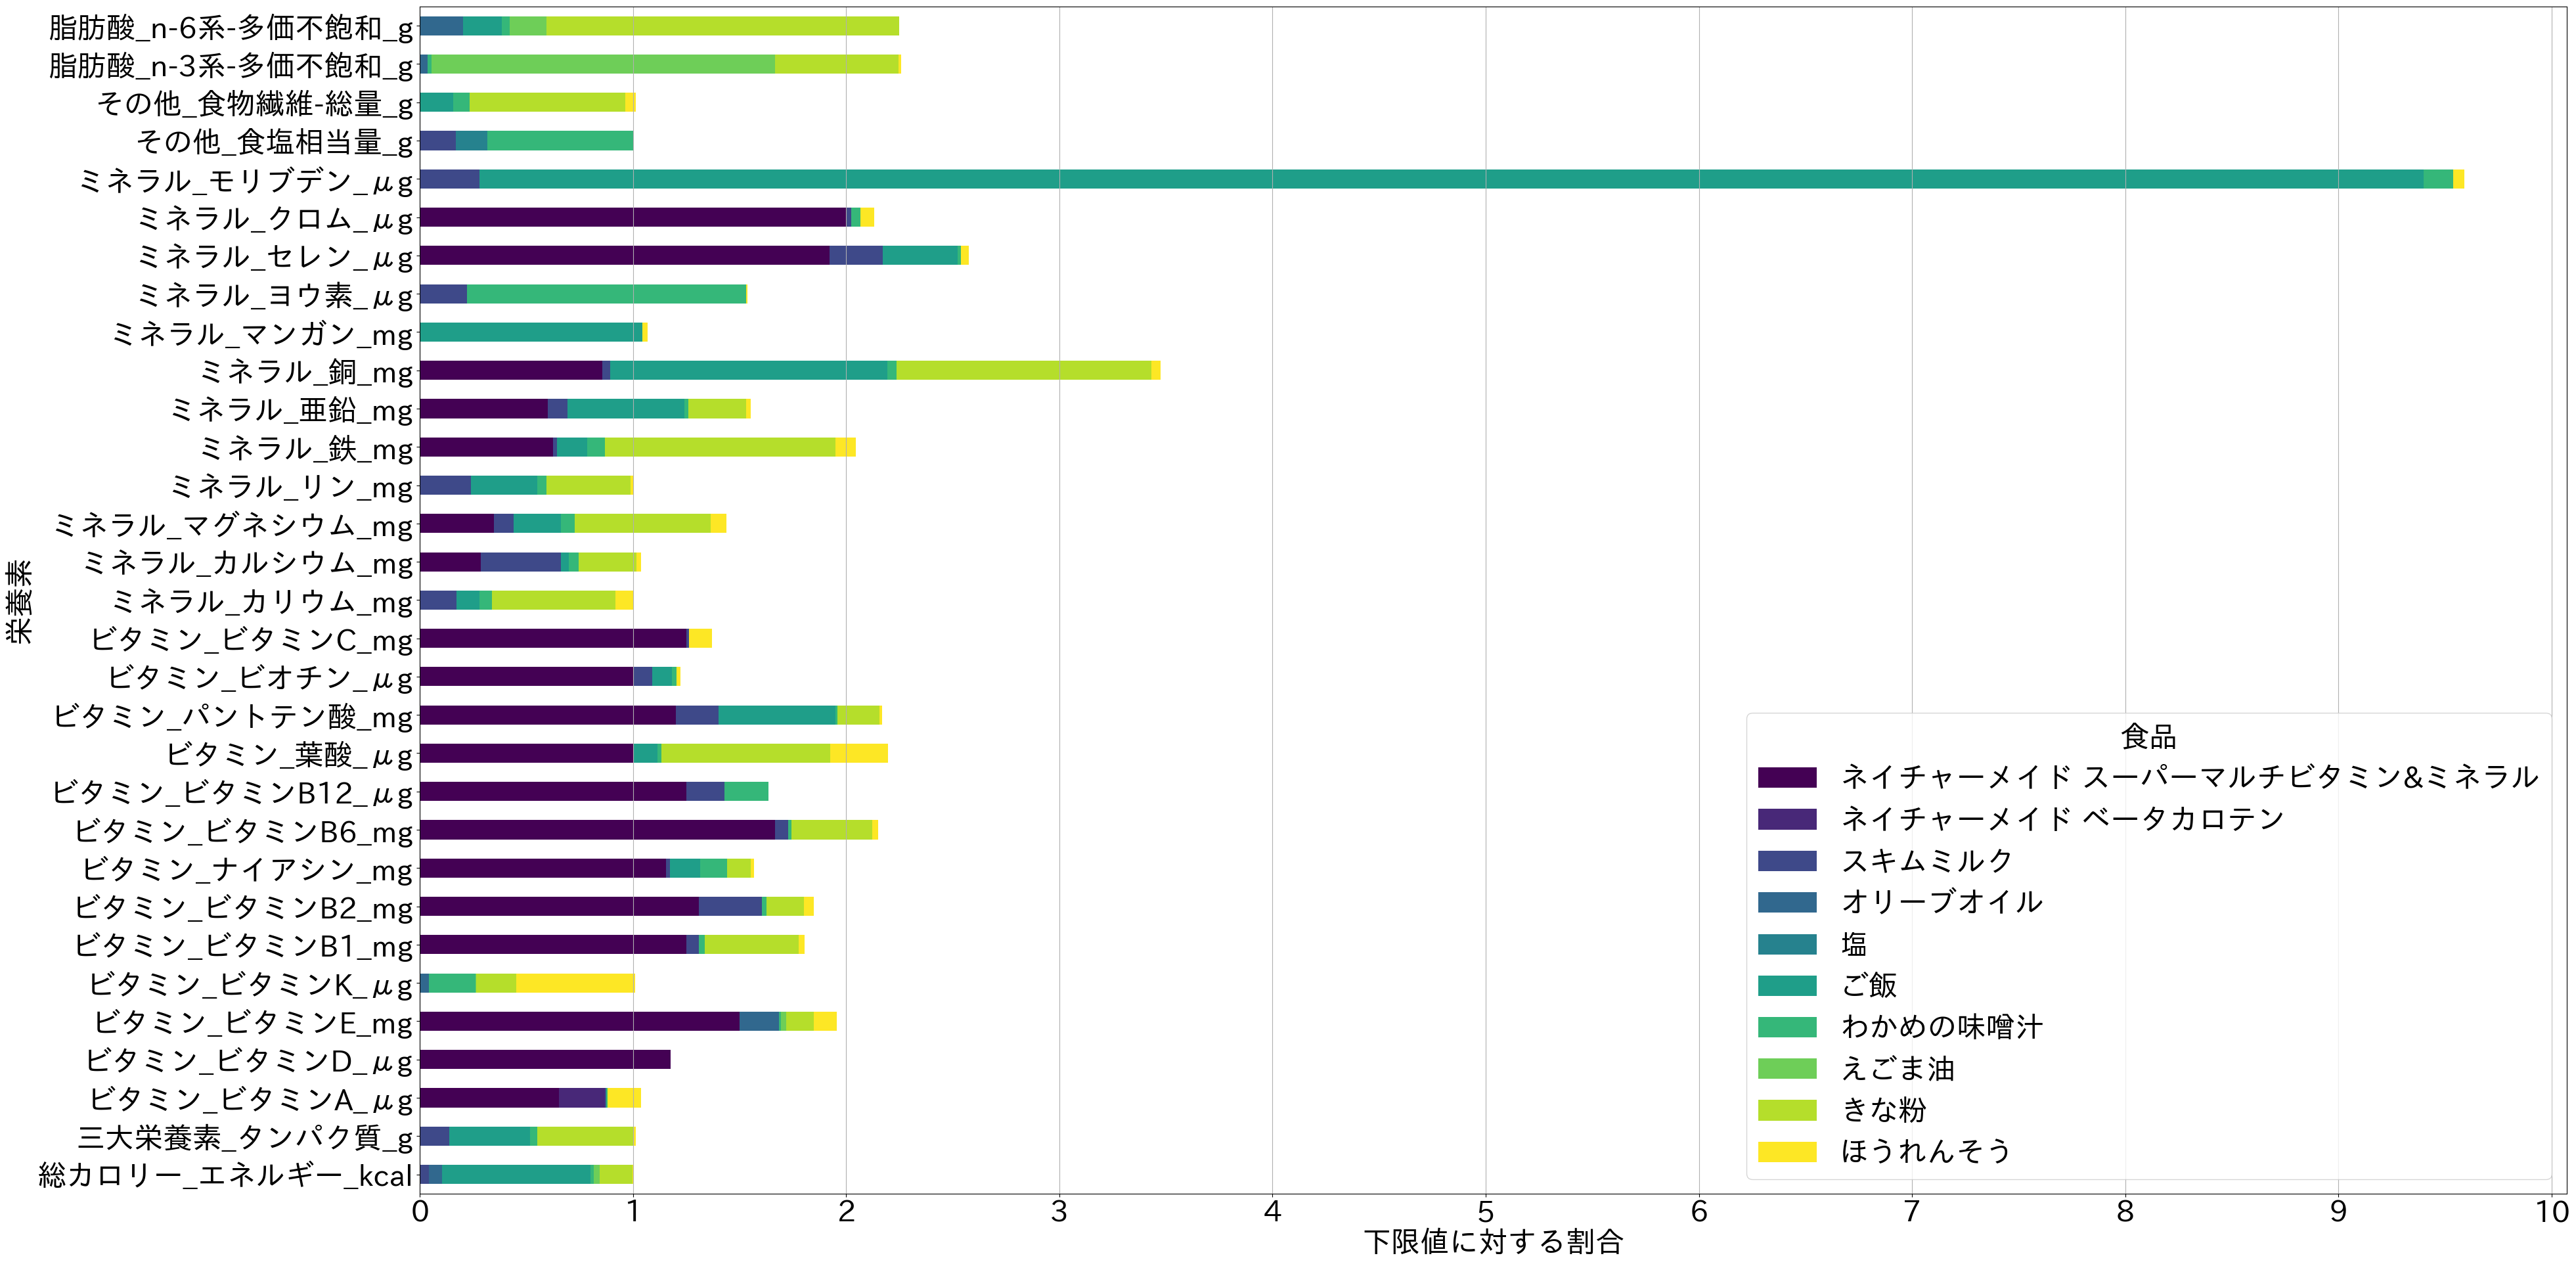

設定されていないもの　　  :  set()
0個なのに設定しているもの :  set()


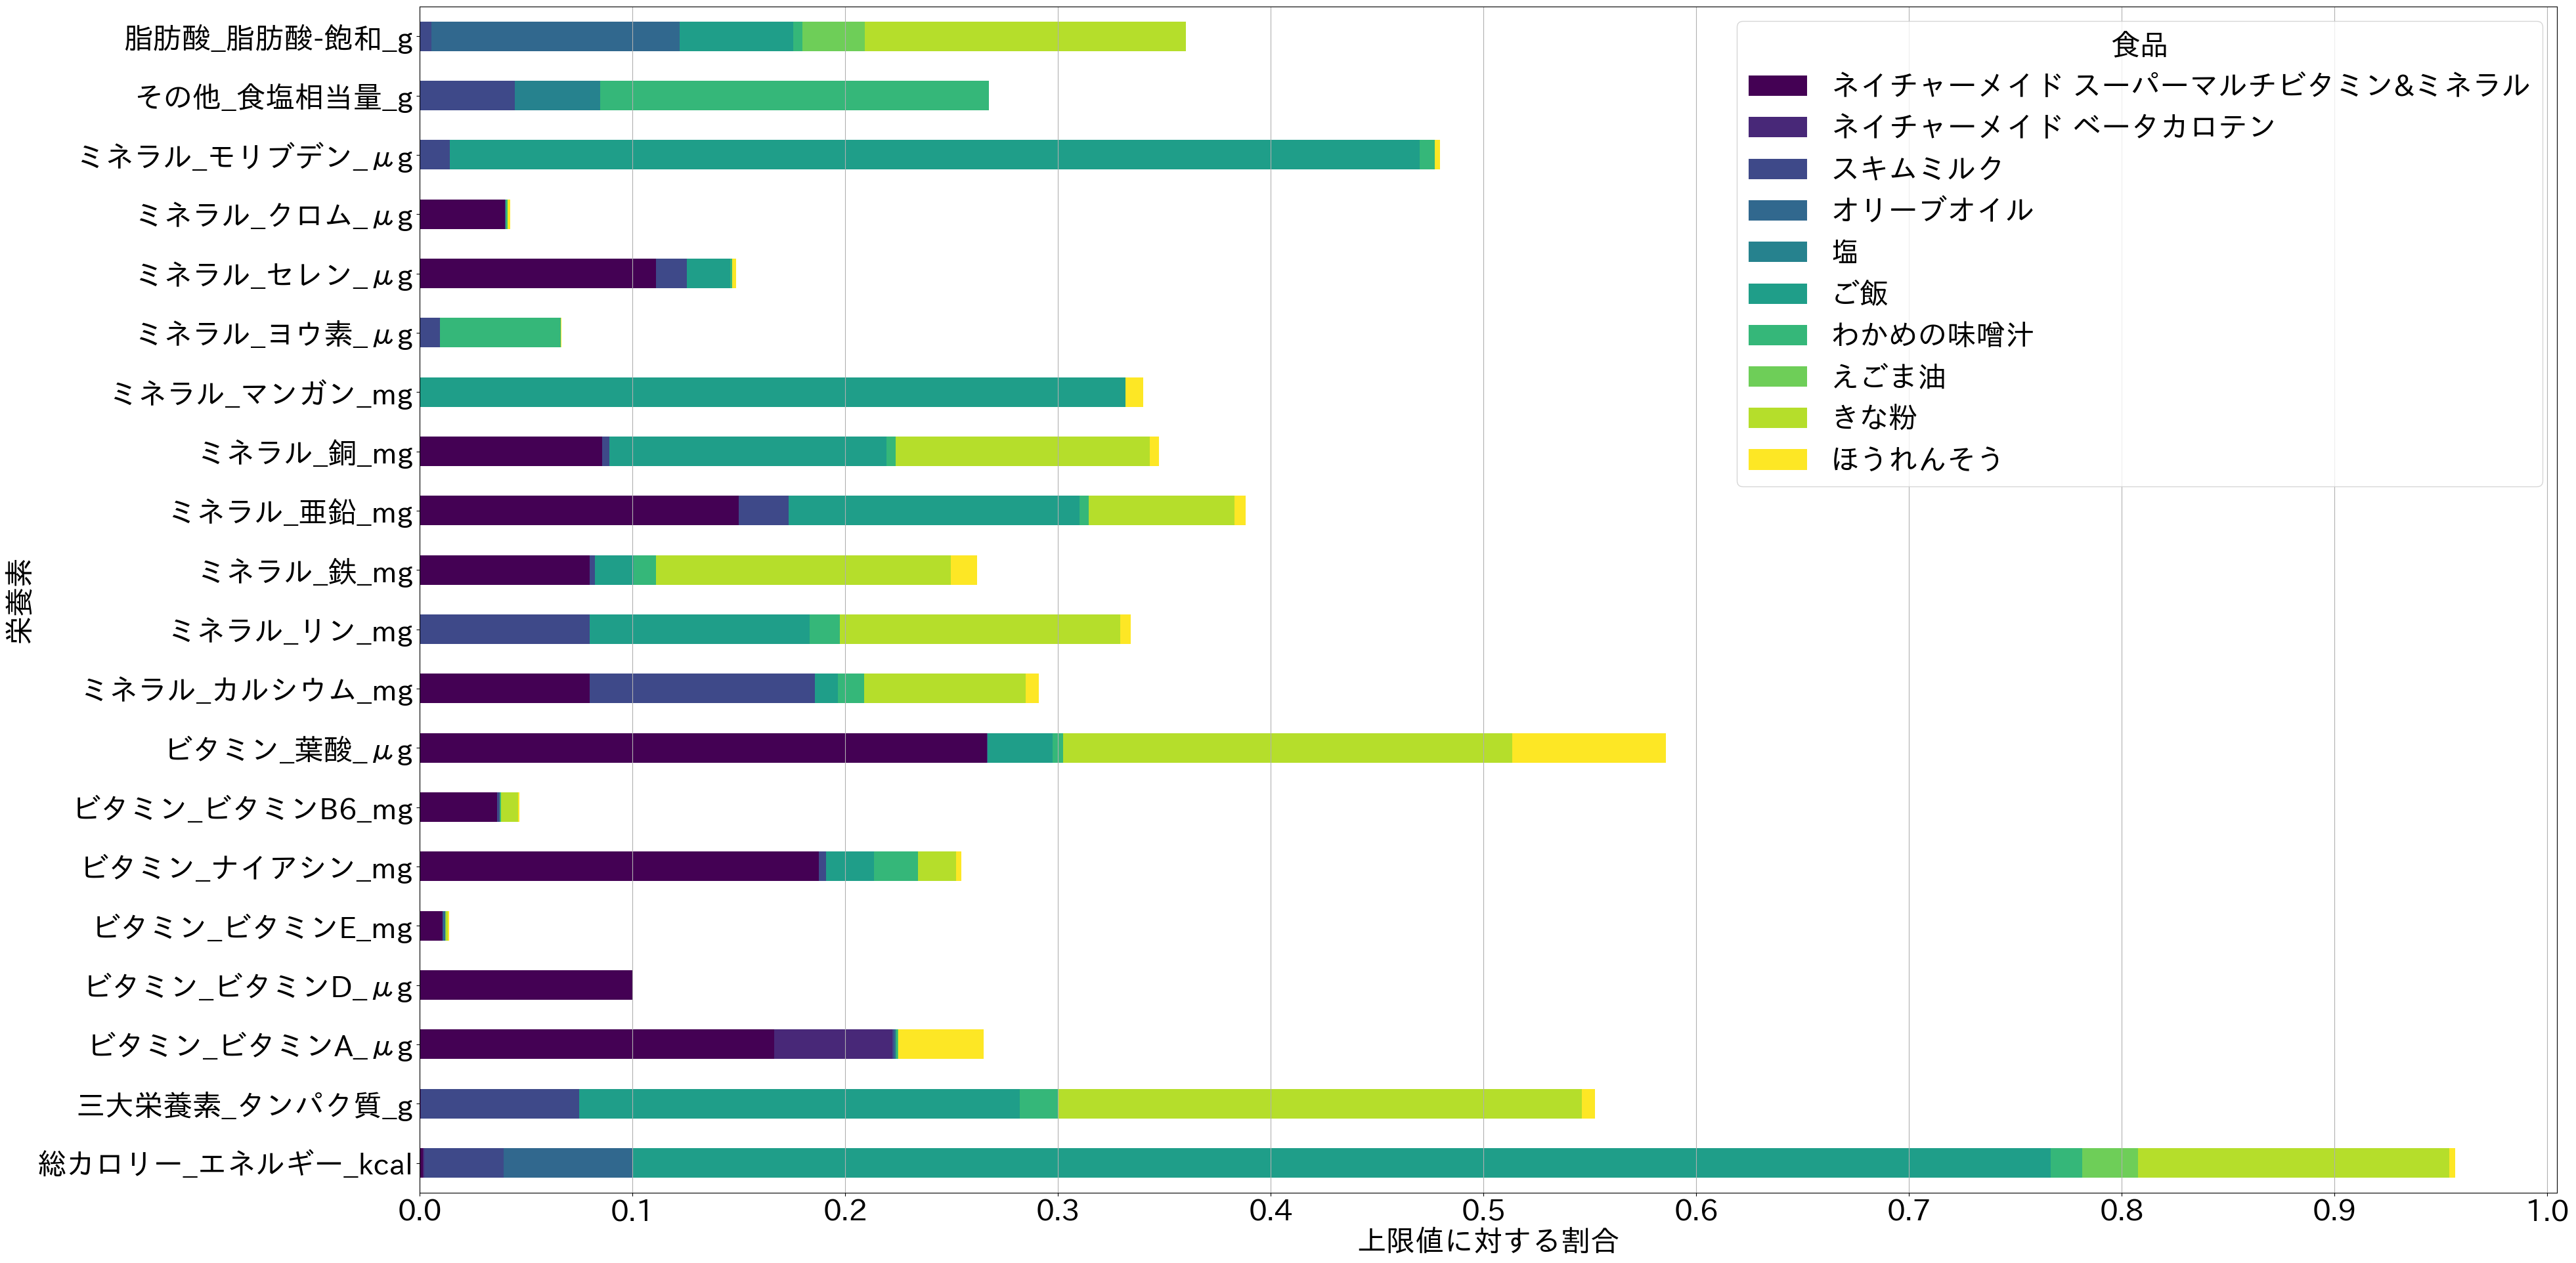

In [6]:
'''食品ごとの下限値に対する割合・上限値に対する割合'''

for i_constraint_column, limit_name in enumerate(['下限値', '上限値']):
    
    # 食品ごとの下限値に対する割合・上限値に対する割合 を作成
    dff       = df_data.loc[:, df_constraint.index] * df_count.values
    dff.index = df_data['食品情報_食品名']
    df_ratio  = dff / df_constraint.iloc[:, i_constraint_column].values
    
    # 全部nanの栄養素は除外
    df_ratio = df_ratio.dropna(axis=1, how='all')
    
    # 個数が0以上の食品を抽出
    df_ratio = df_ratio.loc[df_count.index[(df_count > 0).values.flatten()], :]
    df_ratio.index.name = '食品'
    df_ratio.columns.name = '栄養素'

    # 見やすい順番に並べ替え
    index = [
        'ネイチャーメイド スーパーマルチビタミン&ミネラル',
        'ネイチャーメイド ベータカロテン',
        'スキムミルク',
        'オリーブオイル',
        '塩',
        'ご飯',
        'わかめの味噌汁',
        'えごま油',
        'きな粉',
        'ほうれんそう',
    ]
    set_df      = set(df_ratio.index.tolist())
    set_setting = set(index)
    print('設定されていないもの　　  : ', set_df - set_setting)
    print('0個なのに設定しているもの : ', set_setting - set_df)
    if len(set_df - set_setting) + len(set_setting - set_df) != 0:
        raise
    df_ratio = df_ratio.loc[index, :]
    
    # 描画
    df_ratio.T.plot.barh(y=df_ratio.index.tolist(), figsize=(40,20), stacked=True, cmap='viridis')
    
    if limit_name == '下限値':
        plt.xticks(np.arange(plt.xlim()[1]))
    elif limit_name == '上限値':
        plt.xticks(np.arange(11)/10)
    else:
        raise
        
    plt.grid(which='both', axis='x')
    plt.xlabel(f'{limit_name}に対する割合')
    plt.tight_layout() # なぜかこれすると grid の色がまばらなのが直る
    plt.show()

In [7]:
'''食品ごとの栄養素の合計値'''

i = df_data.columns.tolist().index('総カロリー_エネルギー_kcal')
df_num = df_data.iloc[:, i:]
df_detail = pd.DataFrame((df_num.T.values * df_count['個数'].values), df_num.columns, df_data['食品情報_食品名']).T

pd.set_option('display.max_columns', df_num.shape[1])
display(df_detail)
pd.reset_option('display.max_columns')

,総カロリー_エネルギー_kcal,三大栄養素_タンパク質_g,三大栄養素_脂質_g,三大栄養素_炭水化物_g,ビタミン_ビタミンA_μg,ビタミン_ビタミンD_μg,ビタミン_ビタミンE_mg,ビタミン_ビタミンK_μg,ビタミン_ビタミンB1_mg,ビタミン_ビタミンB2_mg,ビタミン_ナイアシン_mg,ビタミン_ビタミンB6_mg,ビタミン_ビタミンB12_μg,ビタミン_葉酸_μg,ビタミン_パントテン酸_mg,ビタミン_ビオチン_μg,ビタミン_ビタミンC_mg,ミネラル_ナトリウム_mg,ミネラル_カリウム_mg,ミネラル_カルシウム_mg,ミネラル_マグネシウム_mg,ミネラル_リン_mg,ミネラル_鉄_mg,ミネラル_亜鉛_mg,ミネラル_銅_mg,ミネラル_マンガン_mg,ミネラル_ヨウ素_μg,ミネラル_セレン_μg,ミネラル_クロム_μg,ミネラル_モリブデン_μg,その他_食塩相当量_g,その他_食物繊維-総量_g,アミノ酸_アスパラギン酸_mg,アミノ酸_アミノ酸合計_mg,アミノ酸_アラニン_mg,アミノ酸_アルギニン_mg,アミノ酸_アンモニア_mg,アミノ酸_イソロイシン_mg,アミノ酸_グリシン_mg,アミノ酸_グルタミン酸_mg,アミノ酸_セリン_mg,アミノ酸_トリプトファン_mg,アミノ酸_トレオニン(スレオニン)_mg,アミノ酸_バリン_mg,アミノ酸_ヒスチジン_mg,アミノ酸_プロリン_mg,アミノ酸_リシン(リジン)_mg,アミノ酸_ロイシン_mg,アミノ酸_含硫アミノ酸_mg,アミノ酸_芳香族アミノ酸_mg,脂肪酸_18:1-オレイン酸_mg,脂肪酸_18:2-n-6-リノール酸_mg,脂肪酸_18:3-n-3-α－リノレン酸_mg,脂肪酸_18:3-n-6-γ－リノレン酸_mg,脂肪酸_18:4-n-3-オクタデカテトラエン酸_mg,脂肪酸_20:2-n-6-イコサジエン酸_mg,脂肪酸_20:3-n-6-イコサトリエン酸_mg,脂肪酸_20:4-n-3-イコサテトラエン酸_mg,脂肪酸_20:4-n-6-アラキドン酸_mg,脂肪酸_20:5-n-3-イコサペンタエン酸_mg,脂肪酸_21:5-n-3-ヘンイコサペンタエン酸_mg,脂肪酸_22:4-n-6-ドコサテトラエン酸_mg,脂肪酸_22:5-n-3-ドコサペンタエン酸_mg,脂肪酸_22:5-n-6-ドコサペンタエン酸_mg,脂肪酸_22:6-n-3-ドコサヘキサエン酸_mg,脂肪酸_n-3系-多価不飽和_g,脂肪酸_n-6系-多価不飽和_g,脂肪酸_脂肪酸-一価不飽和_g,脂肪酸_脂肪酸-多価不飽和_g,脂肪酸_脂肪酸-総量_g,脂肪酸_脂肪酸-飽和_g
食品情報_食品名,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ご飯,1533.072,22.800,2.736,338.3520,0.000,0.0,0.0000,0.00,0.000,0.000,1.824,0.000,0.000,27.36,2.736,4.560,0.00,9.12,264.48,27.360,63.84,310.080,0.9120,5.472,0.912,3.64800,0.00,9.12,0.00,273.60,0.000,2.736,2006.4,20976.0,1185.60,1732.80,492.48,829.92,1003.20,3739.2,1185.60,319.20,766.08,1185.6,556.32,1003.20,756.96,1732.8,1003.20,2006.4,620.16,912.00,36.48,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.912,0.9120,0.9120,2.7360,0.9120
きな粉,336.604,27.056,17.784,23.5600,0.000,0.0,0.7600,28.12,0.532,0.228,1.444,0.456,0.000,190.00,0.988,0.000,0.00,0.76,1444.00,190.000,182.40,395.200,6.9160,2.736,0.836,0.00000,0.00,0.00,0.00,0.00,0.000,12.844,3344.0,28120.0,1292.00,2052.00,592.80,1292.00,1292.00,5244.0,1444.00,372.40,1140.00,1368.0,836.00,1520.00,1672.00,2204.0,836.00,2508.0,3344.00,8360.00,1368.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.444,8.284,3.4960,9.5760,15.6560,2.5840
わかめの味噌汁,34.000,2.000,0.440,5.8600,2.990,0.0,0.0500,32.96,0.030,0.030,1.640,0.020,0.490,4.47,0.050,1.220,0.00,532.41,150.41,30.800,18.44,42.200,0.5200,0.170,0.030,0.00000,170.00,0.40,0.44,4.16,1.370,1.370,132.0,1188.0,57.59,85.21,26.40,55.19,52.79,216.0,62.40,14.41,46.81,63.6,34.80,63.60,60.00,98.4,32.40,110.4,62.80,182.20,39.79,0.59,9.4,0.00,0.17,0.0,4.80,4.59,0.0,0.0,0.0,0.0,0.0,0.050,0.190,0.0500,0.2400,0.3700,0.0700
ほうれんそう,6.200,0.682,0.124,0.9610,108.500,0.0,0.6510,83.70,0.031,0.062,0.186,0.031,0.000,65.10,0.062,0.899,10.85,4.96,213.90,15.190,21.39,14.570,0.6200,0.217,0.031,0.09300,0.93,0.93,0.62,1.55,0.000,0.868,65.1,589.0,30.38,40.30,22.94,25.42,28.52,99.2,27.28,12.71,26.66,34.1,15.81,25.73,34.10,43.4,19.84,55.8,3.72,10.54,37.20,0.00,0.0,0.31,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.031,0.000,0.0000,0.0620,0.0620,0.0000
塩,0.009,0.000,0.000,0.0021,0.000,0.0,0.0000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.12,0.00,0.000,0.00,0.000,0.0000,0.000,0.000,0.00000,0.00,0.00,0.00,0.00,0.300,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0000,0.0000,0.0000,0.0000
スキムミルク,86.136,8.160,0.240,12.7920,1.440,0.0,0.0000,0.00,0.072,0.384,0.264,0.072,0.432,0.24,1.008,4.488,1.20,136.80,432.00,264.000,26.40,240.000,0.1200,0.936,0.024,0.00000,28.80,6.48,0.24,8.40,0.336,0.000,624.0,8400.0,264.00,264.00,168.00,432.00,153.60,1656.0,432.00,112.80,336.00,504.0,240.00,840.00,624.00,792.0,264.00,768.0,38.40,5.76,0.96,0.00,0.0,0.00,0.48,0.0,0.48,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0480,0.0000,0.1680,0.0960
オリーブオイル,138.750,0.000,15.000,0.0000,2.250,0.0,1.1100,6.30,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.0000,0.000,0.000,0.00000,0.00,0.00,0.00,0.00,0.000,0.000,0.0,0.0,

In [8]:
'''食品ごとの価格（税込）'''

price_ary = (df_data['価格（税込）'].values * df_count.values.flatten())
pd.DataFrame(price_ary, index=df_data['食品情報_食品名'], columns=['価格（税込）'])

,価格（税込）
食品情報_食品名,
ご飯,150.480000
きな粉,57.152000
わかめの味噌汁,17.120000
ほうれんそう,19.840000
塩,0.029100
スキムミルク,31.848000
オリーブオイル,14.745000
えごま油,26.180000
ネイチャーメイド スーパーマルチビタミン&ミネラル,14.750000
